**Descripción del proyecto**

Megaline es una empresa de telecomunicaciones que  ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para ajustar el presupuesto de publicidad.

Se realizará un análisis preliminar de las tarifas basado en una selección relativamente pequeña de 500 clientes para los cuales se conoce: de dónde son, qué tarifa usan y la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. 

Se analizará el comportamiento de los clientes y se determinará qué tarifa de prepago genera más ingresos. Y si los ingresos de los clientes de New York difiere de aquellos de otras cuidades

Descripción de las tarifas.

Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

* Surf

    * Pago mensual: 20$
    
        * 500 minutos al mes, 50 SMS y 15 GB de datos
        
        * Si se exceden los límites del paquete:
            1 minuto: 3 centavos
            1 SMS: 3 centavos
            1 GB de datos: 10$
            
* Ultimate
    * Pago mensual: 70$
    
        * 3000 minutos al mes, 1000 SMS y 30 GB de datos
        
        * Si se exceden los límites del paquete:
            1 minuto: 1 centavo
            1 SMS: 1 centavo
            1 GB de datos: 7$

Para llevar a cabo el proyecto, se realizan una serie de pasos según se describe a continuación: 

Paso 1. Análisis de la información general.

Se cargarán los archivos con la información de la muestra de clientes y se estudiara la información general

Paso 2. Procesamiento de datos

Se prepara los datos para el análisis. Se corrigen tipo de datos y se evalúa la necesidad de procesar  datos conflictivos 

Para cada usuario, se busca:
•	El número de llamadas realizadas y minutos utilizados al mes
•	La cantidad de los SMS enviados por mes.
•	El volumen de datos por mes.
•	Los ingresos mensuales de cada usuario (resta el límite del paquete gratuito del número total de llamadas, SMS y datos; multiplica el resultado por el valor de tarifa de llamadas; agrega el cargo mensual según la tarifa de llamadas)

Paso 3. Análisis de los datos

Se describe el comportamiento de los clientes: los minutos, SMS y volumen de datos que requieren los usuarios de cada tarifa por mes. Se calcula la media, la varianza y la desviación estándar. Se trazan histogramas y se describen las distribuciones. Se trazan graficos para estudiar la evolución de las variables en el tiempo.

Paso 4. Prueba las hipótesis. 

Para dar respuesta a la relación entre promedio de ingresos, se realiza prueba de hipótesis sobre las siguientes afirmaciones:

•	El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.

•	El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

Paso 5. Conclusión general


**Paso 1**
- Importación cargando las librerias 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt 

 - Cargamos los archivos que contienen los datos y estudiamos informacion general

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')

In [3]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


- El dataset de llamadas no presenta valores ausentes. El formato de la columna call_date debe ser corregido al tipo dateTime

In [5]:
# Cambiamos el tipo de datos de call_date a fecha y verificamos
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [6]:
#Agregamos columnas con mes de la llamada y la duracion de los segundos redondeada hacia arriba
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls['duration_round'] = np.ceil(calls['duration'])
calls.head()

,id,user_id,call_date,duration,month,duration_round
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0


In [7]:
#Agrupamos los datos por usuarios y mes, calculando el total de minutos y la cantidad de llamadas

calls_table = calls.pivot_table(index=['user_id', 'month'], values = 'duration_round', aggfunc= ['sum', 'count'])
calls_table.head()

sum          count
              duration_round duration_round
user_id month                              
1000    12             124.0             16
1001    8              182.0             27
        9              315.0             49
        10             393.0             65
        11             426.0             64

In [8]:
#ajustamos el nombre de las columnas
calls_table = calls_table.reset_index()
calls_table.columns= ['user_id','month','call_duration','call_count']
calls_table.head()

,user_id,month,call_duration,call_count
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64


- Nota: la cantidad de llamadas contempla aquellas con tiempo de duracion 0. En el caso de necesitar calcular promedios de duración de llamadas deberian evaluarse eliminar dichos valores. Para el analisis a continuacion no afectan los calculos dado que se suman los totales mensuales 

In [9]:
#cargamos datos de uso de internet
internet = pd.read_csv('/datasets/megaline_internet.csv')

In [10]:
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [11]:
#corregimos el tipo de dato de 'session_date' a dateTime y agregamos columna con el mes
internet['session_date']= pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['month_i'] = pd.DatetimeIndex(internet['session_date']).month
internet.head()

,id,user_id,session_date,mb_used,month_i
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [12]:
#agrupamos por usuario por mes
internet_table = internet.pivot_table(index=['user_id', 'month_i'], values = 'mb_used', aggfunc= ['sum'])
internet_table=internet_table.reset_index()
internet_table.columns = ['user_id', 'month_i', 'mb_used']
internet_table.head()

,user_id,month_i,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [13]:
#Agregamos una columna con los GB consumidos al mes (redondeados al entero superior)
internet_table['gb_used'] = np.ceil(internet_table['mb_used']/1024)
internet_table.head()

,user_id,month_i,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


In [14]:
#Unificamos tablas con informacion de llamadas y de internet)
complete= calls_table.merge(internet_table,left_on= ['user_id', 'month'], right_on = ['user_id', 'month_i'], how = 'outer')
complete.head()



,user_id,month,call_duration,call_count,month_i,mb_used,gb_used
0,1000,12.0,124.0,16.0,12.0,1901.47,2.0
1,1001,8.0,182.0,27.0,8.0,6919.15,7.0
2,1001,9.0,315.0,49.0,9.0,13314.82,14.0
3,1001,10.0,393.0,65.0,10.0,22330.49,22.0
4,1001,11.0,426.0,64.0,11.0,18504.30,19.0


In [15]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2292 non-null   int64  
 1   month          2258 non-null   float64
 2   call_duration  2258 non-null   float64
 3   call_count     2258 non-null   float64
 4   month_i        2277 non-null   float64
 5   mb_used        2277 non-null   float64
 6   gb_used        2277 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 143.2 KB


In [16]:
#rellenamos ausentes de  'month' con los valores de la columna de 'month_i' (corresponden a meses en los que solo se utilizo internet u no llamadas)
complete['month'] = complete['month'].fillna(complete['month_i'])
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2292 non-null   int64  
 1   month          2292 non-null   float64
 2   call_duration  2258 non-null   float64
 3   call_count     2258 non-null   float64
 4   month_i        2277 non-null   float64
 5   mb_used        2277 non-null   float64
 6   gb_used        2277 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 143.2 KB


In [17]:
#Cargamos la inforamcion de mensajes enviados
messages = pd.read_csv('/datasets/megaline_messages.csv')

In [18]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


- La informacion de mensajes no presenta valores ausentes. El formato de la fecha debe ser corregido al tipo de dato adecuado

In [19]:
#convertimos tipo de dato a fecha y agregamos columna con el mes de la llamada
messages['message_date']= pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['month_m'] = pd.DatetimeIndex(messages['message_date']).month
messages.head()

,id,user_id,message_date,month_m
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [20]:
#ajustamos nombres de las columnas
message_table = messages.pivot_table(index=['user_id', 'month_m'], values = 'id', aggfunc= 'count')
message_table=message_table.reset_index()
message_table.columns = ['user_id', 'month_m', 'messages']
message_table.head()

,user_id,month_m,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [21]:
#unificamos tablas con informacion de llamadas y consumo de internet, con la de mensajes enviados
complete2 = complete.merge(message_table,left_on= ['user_id', 'month'], right_on = ['user_id', 'month_m'], how = 'outer')
complete2.head()



,user_id,month,call_duration,call_count,month_i,mb_used,gb_used,month_m,messages
0,1000,12.0,124.0,16.0,12.0,1901.47,2.0,12.0,11.0
1,1001,8.0,182.0,27.0,8.0,6919.15,7.0,8.0,30.0
2,1001,9.0,315.0,49.0,9.0,13314.82,14.0,9.0,44.0
3,1001,10.0,393.0,65.0,10.0,22330.49,22.0,10.0,53.0
4,1001,11.0,426.0,64.0,11.0,18504.30,19.0,11.0,36.0


In [22]:
complete2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   int64  
 1   month          2292 non-null   float64
 2   call_duration  2258 non-null   float64
 3   call_count     2258 non-null   float64
 4   month_i        2277 non-null   float64
 5   mb_used        2277 non-null   float64
 6   gb_used        2277 non-null   float64
 7   month_m        1806 non-null   float64
 8   messages       1806 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 179.1 KB


In [23]:
#completamos valores ausentes de month con datos de month_m (corresponden a meses donde solo hubo consumo de mensaje)
complete2['month'] = complete2['month'].fillna(complete2['month_m'])
complete2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   int64  
 1   month          2293 non-null   float64
 2   call_duration  2258 non-null   float64
 3   call_count     2258 non-null   float64
 4   month_i        2277 non-null   float64
 5   mb_used        2277 non-null   float64
 6   gb_used        2277 non-null   float64
 7   month_m        1806 non-null   float64
 8   messages       1806 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 179.1 KB


In [24]:
#cargamos informacion de planes
plans = pd.read_csv('/datasets/megaline_plans.csv')

In [25]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [26]:
#cargamos informacion de los usuarios
users = pd.read_csv('/datasets/megaline_users.csv')

In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [28]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [29]:
#Agregamos a la tabla con datos de consumo, los datos de los usuarios
complete3 = complete2.merge(users, on='user_id', how = 'left')

In [30]:
complete3.head()


,user_id,month,call_duration,call_count,month_i,mb_used,gb_used,month_m,messages,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,124.0,16.0,12.0,1901.47,2.0,12.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,8.0,182.0,27.0,8.0,6919.15,7.0,8.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,9.0,315.0,49.0,9.0,13314.82,14.0,9.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,10.0,393.0,65.0,10.0,22330.49,22.0,10.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,11.0,426.0,64.0,11.0,18504.30,19.0,11.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [31]:
#analizamos informacion de la tabla
complete3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   int64  
 1   month          2293 non-null   float64
 2   call_duration  2258 non-null   float64
 3   call_count     2258 non-null   float64
 4   month_i        2277 non-null   float64
 5   mb_used        2277 non-null   float64
 6   gb_used        2277 non-null   float64
 7   month_m        1806 non-null   float64
 8   messages       1806 non-null   float64
 9   first_name     2293 non-null   object 
 10  last_name      2293 non-null   object 
 11  age            2293 non-null   int64  
 12  city           2293 non-null   object 
 13  reg_date       2293 non-null   object 
 14  plan           2293 non-null   object 
 15  churn_date     158 non-null    object 
dtypes: float64(8), int64(2), object(6)
memory usage: 304.5+ KB


In [32]:
# Rellenamos valores ausentes de consumos de las columnas de interes con ceros
complete3['call_duration'] = complete3['call_duration'].fillna(0)
complete3['gb_used'] = complete3['gb_used'].fillna(0)
complete3['messages'] = complete3['messages'].fillna(0)
complete3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   int64  
 1   month          2293 non-null   float64
 2   call_duration  2293 non-null   float64
 3   call_count     2258 non-null   float64
 4   month_i        2277 non-null   float64
 5   mb_used        2277 non-null   float64
 6   gb_used        2293 non-null   float64
 7   month_m        1806 non-null   float64
 8   messages       2293 non-null   float64
 9   first_name     2293 non-null   object 
 10  last_name      2293 non-null   object 
 11  age            2293 non-null   int64  
 12  city           2293 non-null   object 
 13  reg_date       2293 non-null   object 
 14  plan           2293 non-null   object 
 15  churn_date     158 non-null    object 
dtypes: float64(8), int64(2), object(6)
memory usage: 304.5+ KB


In [33]:
complete3.head(3)

,user_id,month,call_duration,call_count,month_i,mb_used,gb_used,month_m,messages,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,124.0,16.0,12.0,1901.47,2.0,12.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,8.0,182.0,27.0,8.0,6919.15,7.0,8.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,9.0,315.0,49.0,9.0,13314.82,14.0,9.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [34]:
#segmentamos el dataset por tipo de plan
ultimate = complete3[complete3['plan']=='ultimate']
ultimate.head()

,user_id,month,call_duration,call_count,month_i,mb_used,gb_used,month_m,messages,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,124.0,16.0,12.0,1901.47,2.0,12.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
19,1006,11.0,10.0,2.0,11.0,2068.37,3.0,11.0,15.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
20,1006,12.0,59.0,9.0,12.0,32118.82,32.0,12.0,139.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
26,1008,10.0,476.0,71.0,10.0,17106.99,17.0,10.0,21.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
27,1008,11.0,446.0,63.0,11.0,23676.72,24.0,11.0,37.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN


In [35]:
surf = complete3[complete3['plan']=='surf']
surf.head()


,user_id,month,call_duration,call_count,month_i,mb_used,gb_used,month_m,messages,first_name,last_name,age,city,reg_date,plan,churn_date
1,1001,8.0,182.0,27.0,8.0,6919.15,7.0,8.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,9.0,315.0,49.0,9.0,13314.82,14.0,9.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,10.0,393.0,65.0,10.0,22330.49,22.0,10.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,11.0,426.0,64.0,11.0,18504.30,19.0,11.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
5,1001,12.0,412.0,56.0,12.0,19369.18,19.0,12.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


**Paso 3** 

Analisis de datos

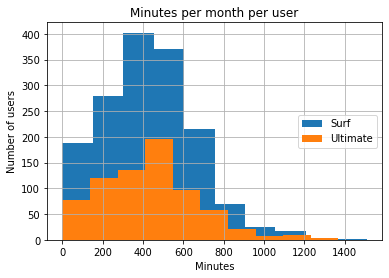

In [36]:
#Distribucion de minutos de llamas por mes por tipo de plan
surf['call_duration'].hist(label = 'Surf')
ultimate['call_duration'].hist(label = 'Ultimate')

plt.xlabel('Minutes')
plt.ylabel('Number of users')
plt.title('Minutes per month per user')
plt.legend(loc= 5)

In [37]:
print('Media de llamadas Surf:', round(np.mean(surf['call_duration'])))
print('Varianza de llamadas Surf:', round(np.var(surf['call_duration'])))
print('Desvio de llamadas Surf:', round(np.std(surf['call_duration'])))
print()

print('Media de llamadas Ultimate:', round(np.mean(ultimate['call_duration'])))
print('Varianza de llamadas Ultimate:', round(np.var(ultimate['call_duration'])))
print('Desvio de llamadas Ultimate:', round(np.std(ultimate['call_duration'])))



Media de llamadas Surf: 429
Varianza de llamadas Surf: 54933
Desvio de llamadas Surf: 234

Media de llamadas Ultimate: 430
Varianza de llamadas Ultimate: 57764
Desvio de llamadas Ultimate: 240


- Ambas tarifas tienen una distribucion de consumo de minutos de llamadas similar. La media de consumo es similar aunque el desvio estandar es levemente superios para el caso de tarifa ultimate.

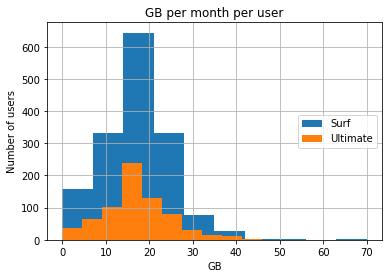

In [38]:
#Distribucion de gb utilizados por mes por tipo de plan
surf['gb_used'].hist(label = 'Surf')
ultimate['gb_used'].hist(label = 'Ultimate')

plt.xlabel('GB')
plt.ylabel('Number of users')
plt.title('GB per month per user')
plt.legend(loc= 5)

In [39]:
print('Media de GB  Surf:', round(np.mean(surf['gb_used'])))
print('Varianza de GB  Surf:', round(np.var(surf['gb_used'])))
print('Desvio de GB  Surf:', round(np.std(surf['gb_used'])))
print()
print('Media de GB Ultimate:', round(np.mean(ultimate['gb_used'])))
print('Varianza de GB  Ultimate:', round(np.var(ultimate['gb_used'])))
print('Desvio de GB  Ultimate:', round(np.std(ultimate['gb_used'])))

Media de GB  Surf: 17
Varianza de GB  Surf: 62
Desvio de GB  Surf: 8

Media de GB Ultimate: 17
Varianza de GB  Ultimate: 59
Desvio de GB  Ultimate: 8


- Ambas tarifas tienen una distribucion de consumo de GB similar, con una media y un desvío estandard practicamente igual.

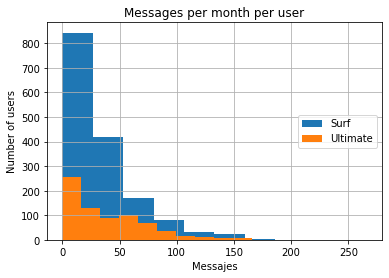

In [40]:
#Distribucion de SMS utilizados por mes por tipo de plan
surf['messages'].hist(label = 'Surf')
ultimate['messages'].hist(label = 'Ultimate')

plt.xlabel('Messajes')
plt.ylabel('Number of users')
plt.title('Messages per month per user')
plt.legend(loc= 5)

In [41]:
print('Media de SMS Surf:', round(np.mean(surf['messages'])))
print('Varianza de SMS Surf:', round(np.var(surf['messages'])))
print('Desvio de SMS Surf:', round(np.std(surf['messages'])))
print()
print('Media de SMS Ultimate:', round(np.mean(ultimate['messages'])))
print('Varianza de SMS Ultimate:', round(np.var(ultimate['messages'])))
print('Desvio de SMS Ultimate:', round(np.std(ultimate['messages'])))

Media de SMS Surf: 31
Varianza de SMS Surf: 1126
Desvio de SMS Surf: 34

Media de SMS Ultimate: 38
Varianza de SMS Ultimate: 1207
Desvio de SMS Ultimate: 35


- Ambas tarifas tienen una distribucion de consumo de mensajes relativamente similar. Los usuario de la tarifa ULtimate cuentan con una media de consumo superior y un desvio standard superior a aquellos usuarios de Surf

- Analisis de evolucion en el tiempo

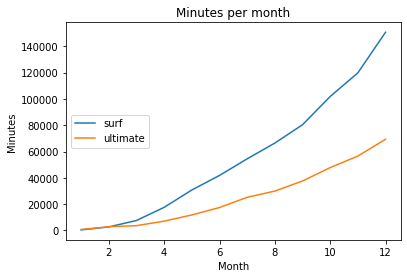

In [42]:
#Analisis de envolucion de consumo de llamadas a lo largo del año por tipo de plan
surf.groupby('month')['call_duration'].sum().plot(label = 'surf')
ultimate.groupby('month')['call_duration'].sum().plot(label = 'ultimate')

plt.xlabel('Month')
plt.ylabel('Minutes')
plt.title('Minutes per month')
plt.legend(loc= 6)

157

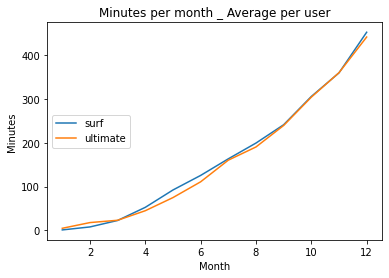

In [43]:
#Analisis de envolucion de consumo de llamadas a lo largo del año por tipo de plan (promedio por usuario)

surf_users = len(surf['user_id'].unique())
ultimate_users = len(ultimate['user_id'].unique())

(surf.groupby('month')['call_duration'].sum()/surf_users).plot(label = 'surf')
(ultimate.groupby('month')['call_duration'].sum()/ultimate_users).plot(label = 'ultimate')

plt.xlabel('Month')
plt.ylabel('Minutes')
plt.title('Minutes per month _ Average per user')
plt.legend(loc= 6)
ultimate_users

- Ambas tarifas cuentan con un consumo promedio de minutos de llamada por usuario similar a lo largo del año. Se observa un patron de consumo creciente en volumen desde el inicio del año hacia el fianl del mismo

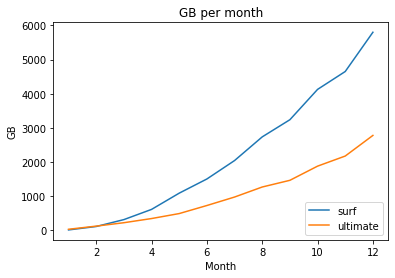

In [44]:
#Analisis de envolucion de consumo de GB a lo largo del año por tipo de plan
surf.groupby('month')['gb_used'].sum().plot(label = 'surf')
ultimate.groupby('month')['gb_used'].sum().plot(label = 'ultimate')

plt.xlabel('Month')
plt.ylabel('GB')
plt.title('GB per month')
plt.legend(loc= 4)

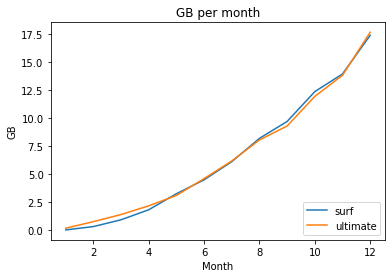

In [45]:
#Analisis de envolucion de consumo de GB a lo largo del año por tipo de plan (promedio por usuario)
(surf.groupby('month')['gb_used'].sum()/surf_users).plot(label = 'surf')
(ultimate.groupby('month')['gb_used'].sum()/ultimate_users).plot(label = 'ultimate')

plt.xlabel('Month')
plt.ylabel('GB')
plt.title('GB per month')
plt.legend(loc= 4)

- Ambas tarifas cuentan con un consumo promedio de internet por usuario similar a lo largo del año. Se observa un patron de consumo creciente en volumen desde el inicio del año hacia el fianl del mismo

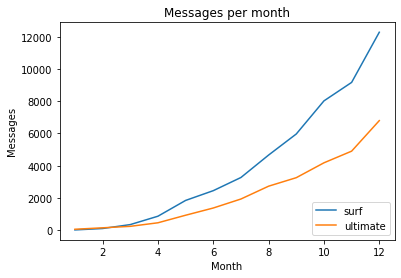

In [46]:
#Analisis de envolucion de consumo de mensajes a lo largo del año por tipo de plan
surf.groupby('month')['messages'].sum().plot(label = 'surf')
ultimate.groupby('month')['messages'].sum().plot(label = 'ultimate')

plt.xlabel('Month')
plt.ylabel('Messages')
plt.title('Messages per month')
plt.legend(loc= 4)

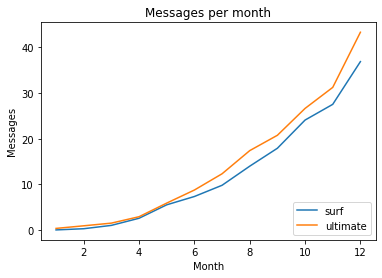

In [47]:
#Analisis de envolucion de consumo de mensajes a lo largo del año por tipo de plan - promedio por usuario
(surf.groupby('month')['messages'].sum()/surf_users).plot(label = 'surf')
(ultimate.groupby('month')['messages'].sum()/ultimate_users).plot(label = 'ultimate')

plt.xlabel('Month')
plt.ylabel('Messages')
plt.title('Messages per month')
plt.legend(loc= 4)

- Se observa un patron de consumo creciente en volumen desde el inicio del año hacia el fianl del mismo. El volumen de mensajes por usuario promedio es superior en el caso de usuarios de la tarifa Ultimate

**Calculo de costos por consumos extras**

In [48]:
##Definimos una funcion para calcular los costos excedentes

def excedent_cost (row, max_limit, excedent_cost, parametro):
    consumo_mes = row[parametro]
    if consumo_mes - max_limit > 0:
        costo_extra = (consumo_mes - max_limit)*excedent_cost
    else:
        costo_extra = 0
    return costo_extra



In [49]:
#Aplicamos la funcion para calcular costo por minuto excedente en las tablas de datos de surf y de ultimate
parameter = 'call_duration'
surf_min_limit = 500
surf_min_cost = 0.03
ultimate_min_limit = 3000
ultimate_min_cost = 0.01
surf['min_cost'] = surf.apply(lambda aux: excedent_cost(aux, surf_min_limit, surf_min_cost, parameter), axis=1)
ultimate['min_cost'] = ultimate.apply(lambda aux: excedent_cost(aux, ultimate_min_limit, ultimate_min_cost, parameter), axis=1)

/tmp/ipykernel_113/1529099311.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surf['min_cost'] = surf.apply(lambda aux: excedent_cost(aux, surf_min_limit, surf_min_cost, parameter), axis=1)
/tmp/ipykernel_113/1529099311.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimate['min_cost'] = ultimate.apply(lambda aux: excedent_cost(aux, ultimate_min_limit, ultimate_min_cost, parameter), axis=1)


In [50]:
#surf.sort_values(by='call_duration', ascending = False) 

In [51]:
#Aplicamos la funcion para calcular costo por gb excedente en las tablas de datos de surf y de ultimate
parameter = 'gb_used'
surf_gb_limit = 15
surf_gb_cost = 10
ultimate_gb_limit = 30
ultimate_gb_cost = 7
surf['gb_cost'] = surf.apply(lambda aux: excedent_cost(aux, surf_gb_limit, surf_gb_cost, parameter), axis=1)
ultimate['gb_cost'] = ultimate.apply(lambda aux: excedent_cost(aux, ultimate_gb_limit, ultimate_gb_cost, parameter), axis=1)

/tmp/ipykernel_113/49652172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surf['gb_cost'] = surf.apply(lambda aux: excedent_cost(aux, surf_gb_limit, surf_gb_cost, parameter), axis=1)
/tmp/ipykernel_113/49652172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimate['gb_cost'] = ultimate.apply(lambda aux: excedent_cost(aux, ultimate_gb_limit, ultimate_gb_cost, parameter), axis=1)


In [52]:
#surf.sort_values(by='gb_used', ascending = False) 

In [53]:
#aplicamos la funcion para calcular costo de SMS excedente en las tablas de surf y de ultimate
parameter = 'messages'
surf_sms_limit = 50
surf_sms_cost = 0.03
ultimate_sms_limit = 1000
ultimate_sms_cost = 0.01
surf['sms_cost'] = surf.apply(lambda aux: excedent_cost(aux, surf_sms_limit, surf_sms_cost, parameter), axis=1)
ultimate['sms_cost'] = ultimate.apply(lambda aux: excedent_cost(aux, ultimate_sms_limit, ultimate_sms_cost, parameter), axis=1)

/tmp/ipykernel_113/1685733361.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surf['sms_cost'] = surf.apply(lambda aux: excedent_cost(aux, surf_sms_limit, surf_sms_cost, parameter), axis=1)
/tmp/ipykernel_113/1685733361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimate['sms_cost'] = ultimate.apply(lambda aux: excedent_cost(aux, ultimate_sms_limit, ultimate_sms_cost, parameter), axis=1)


In [54]:
#surf.sort_values(by='messages', ascending = False).head()

- Calculo de ingresos mensuales totales por mes por usuario

In [55]:
#Calculo de ingresos totale para la tarifa SURF
surf_fijo = 20
surf['total_income'] = surf['min_cost']+surf['gb_cost']+surf['sms_cost']+ surf_fijo
surf.head()

/tmp/ipykernel_113/2600446437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surf['total_income'] = surf['min_cost']+surf['gb_cost']+surf['sms_cost']+ surf_fijo


,user_id,month,call_duration,call_count,month_i,mb_used,gb_used,month_m,messages,first_name,last_name,age,city,reg_date,plan,churn_date,min_cost,gb_cost,sms_cost,total_income
1,1001,8.0,182.0,27.0,8.0,6919.15,7.0,8.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,0.0,0.00,20.00
2,1001,9.0,315.0,49.0,9.0,13314.82,14.0,9.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,0.0,0.00,20.00
3,1001,10.0,393.0,65.0,10.0,22330.49,22.0,10.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,70.0,0.09,90.09
4,1001,11.0,426.0,64.0,11.0,18504.30,19.0,11.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,40.0,0.00,60.00
5,1001,12.0,412.0,56.0,12.0,19369.18,19.0,12.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,40.0,0.00,60.00


In [56]:
#Calculo de ingresos totale para la tarifa Ultimate
ultimate_fijo = 70
ultimate['total_income'] = ultimate['min_cost']+ultimate['gb_cost']+ultimate['sms_cost']+ ultimate_fijo
ultimate.head()

/tmp/ipykernel_113/3172717367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimate['total_income'] = ultimate['min_cost']+ultimate['gb_cost']+ultimate['sms_cost']+ ultimate_fijo


,user_id,month,call_duration,call_count,month_i,mb_used,gb_used,month_m,messages,first_name,last_name,age,city,reg_date,plan,churn_date,min_cost,gb_cost,sms_cost,total_income
0,1000,12.0,124.0,16.0,12.0,1901.47,2.0,12.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0,0.0,0,70.0
19,1006,11.0,10.0,2.0,11.0,2068.37,3.0,11.0,15.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,0,0.0,0,70.0
20,1006,12.0,59.0,9.0,12.0,32118.82,32.0,12.0,139.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,0,14.0,0,84.0
26,1008,10.0,476.0,71.0,10.0,17106.99,17.0,10.0,21.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,0,0.0,0,70.0
27,1008,11.0,446.0,63.0,11.0,23676.72,24.0,11.0,37.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,0,0.0,0,70.0


- Análisis de la ingresos por tipo de plan

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: total_income, dtype: float64

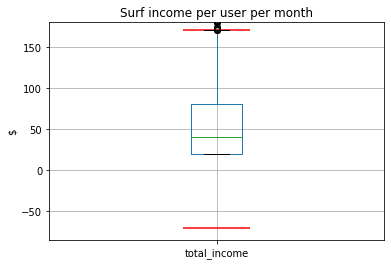

In [57]:
#Ingresos tarifa SURF

Q1 = surf['total_income'].quantile(0.25)
Q3 = surf['total_income'].quantile(0.75)
IQR = Q3 - Q1

surf.boxplot(column = 'total_income')
plt.hlines(y = Q1-1.5*IQR, xmin=0.9, xmax = 1.1 , color = 'red')
plt.hlines(y = Q3+1.5*IQR, xmin=0.9, xmax = 1.1 , color = 'red')
plt.ylim(-85, 180)
plt.title('Surf income per user per month')
plt.ylabel('$')
surf['total_income'].describe()

- Los valores de ingresos de usuarios de Surf, estan fuertemente concentrados en valores mas pequeños que la mediana(el valor teorico del bigote inferior, esta muy por debajo del valor minimo de 20). 
- Presentan valores de ingresos atipicos por encima del quantile 75%
- Los valore de ingresos presentan una desviacion standard significativa respecto de la media

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: total_income, dtype: float64

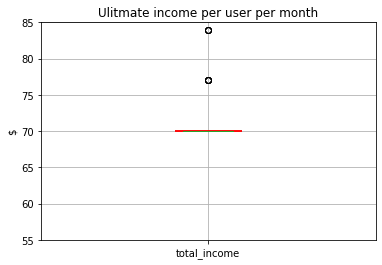

In [58]:
#ingresos tarifa Ultimate

Q1 = ultimate['total_income'].quantile(0.25)
Q3 = ultimate['total_income'].quantile(0.75)
IQR = Q3 - Q1

ultimate.boxplot(column = 'total_income')
plt.hlines(y = Q1-1.5*IQR, xmin=0.9, xmax = 1.1 , color = 'red')
plt.hlines(y = Q3+1.5*IQR, xmin=0.9, xmax = 1.1 , color = 'red')
plt.ylim(55, 85)
plt.title('Ulitmate income per user per month')
plt.ylabel('$')
ultimate['total_income'].describe()


- Los valores de ingresos de usuarios de la tarifa Ultimate, están fuertemente concentrados en torno a la mediana de valores, presentando una desviacion standard respecto de la media muy pequeña

- Paso 4. **Prueba de hipostesis:**


Caso 1:

Hipoteisis nula: la media de ultimate y de surf son iguales

Hipotesis alternativa: la media de ultimate y de surf son distintas

Nivel de significancia alpha = 5%

In [59]:
#Evaluamos la hipotesis de igualdad de medias de ambas tarifas
results_fee = st.ttest_ind(ultimate['total_income'],surf['total_income'] )

In [60]:
alpha = 0.05
print('p-value: ', results_fee.pvalue)

if (results_fee.pvalue  < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value:  2.862674510698644e-08
Rechazamos la hipótesis nula


- Dado que pvalue < alpha , se rechaza la hipotesis nula. Por lo tanto no podemos concluir con  un nivel de confianza del 95% que las medias de ingresos mensuales por usuario difieren entre ambas tarifas

- Caso 2: Prueba de hipostesis:

Hipoteisis nula: el ingreso promedio de usuarios en new york es igual a la de otras ciudades

Hipotesis alternativa: el ingreso promedio de usuarios en new york es distinta a la de otras ciudades

Nivel de significancia alpha = 5%

In [61]:
#Creamos un df con los datos de ambas tarifas
df1 = ultimate[['total_income', 'city', 'user_id']]
df2 = surf[['total_income', 'city', 'user_id']]
income_all = df1.append(df2)


In [62]:
#Creamos un df para los usuarios de New york y otro para el resto
new_york = income_all[income_all['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
other = income_all[~(income_all['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]

In [63]:
#Probamos la hipostesis de la igualdad de medias
results_city = st.ttest_ind(new_york['total_income'] ,other['total_income'] )

alpha = 0.05
print('p-value: ', results_city.pvalue)

if (results_city.pvalue  < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value:  0.04355743162134274
Rechazamos la hipótesis nula


- Dado que pvalue< alpha , se rechaza la hipotesis nula y se acepta la hipostetis alternativa. Podemos asegurar con una confianza del 95% que las medias de ingresos mensuales por cliente son distintas para New York en comparacion con el resto de las cuidades

# Resumen y conclusiones.

Para el procesamiento de datos se realizaron ajuste y se agregaron columnas necesarias: 

* Se ajustaron el tipo de datos de las columnas conteniendo fechas al tipo Daytime
* Se agregaron las columnas necesarias para el análisis de los datos: mes en que se realizaron las llamadas, se enviaron los sms y se consumieron GB. A su vez se redondearon los consumos individuales de llamadas y mensuales de gb
* Se crearon tablas para consolidar la información de consumo por usuario por mes.
* Se unificaron las tablas con toda la información de consumos por mes y se agrega la información de tipo de plan. A esta tabla resultante, se le completan los nombres de usuarios ausentes y se rellenan los valores de consumos ausentes por ceros

Para el analisis de datos, se segmentaron los datos por tipo de plan y se trazaron histogramas de consumo. Se calcularon medias, varianzas y desvíos, concluyendo que:

* La duración de las llamadas de usuarios de ambos planes tiene una distribución similar, con una media similiar (429 vs 430) y un desvío standard levemente superior para el  caso de los usuarios de ultimate (234 vs 240)
* El consumo de internet de ambos planes tiene una distribución similar, con una media y un desvío estándar similares entre si (media en torno a 17 y desvío standard en torno a 8)
* La cantidad de sms enviados por mes, tiene una distribución similar para los usuarios de ambos planes, con una media superior para el caso de usuarios de ultimate (31 vs 38) y un desvío standard relativamente similar (34 vs 35)

A su vez, se trazaron graficos de lineas para analizar la evolucion de consumos en el tiempo, concluyendo que:
Los consumos de minutos de llamada, mensajes y gb, aumentan desde el inicio alcanzando un pico hacia el final del año. Dicho comportamiento es semejante para ambos tipo de plan.

En cuanto al consumo promedio por usuario, el mismo es similar para el consumo de minutos y gb. EL consumo de mensajes por usuario es superior para el caso de tarifa Ultimate, en especial hacia los ultimos meses del año.

Se trazaron diagramas de caja para la media de ingresos. A partir de los mismos se concluyó que:

- Los valores de ingresos de usuarios de Surf, estan fuertemente concentrados en valores mas pequeños que la mediana de 61$, con una desviacion standard significativa respecto de la media 55$


- Los valores de ingresos de usuarios de la tarifa Ultimate, están fuertemente concentrados en torno a la mediana de valores de 70$, presentando una desviacion standard respecto de la media pequeña de 11$

**Prueba de hipótesis**

Se creo una función para calcular el costo de los consumos excedentes de cada plan. Se aplica la función a la tabla, generando nuevas columnas de costo adicionales. Con dicha información se calcula el ingreso total por cliente por mes

Caso 1.
Hipótesis Nula: la media de ingresos mensuales por cliente Ultimate es igual a la de los clientes surf

Hipótesis alternativa: la media de ingresos mensuales por cliente Ultimate es distinta a la de los clientes surf

Se realizó una prueba ttest de igualdad de medias para ambas poblaciones, con Alpha igual a 5%. Dado que el pvalue obtenido es menor a alpha , se rechaza la hipótesis nula. Se puede afirmar con un nivel de confianza del 95% que las medias de ingreso difieren según el tipo de tarifa.

Caso 2.
Hipótesis Nula: la media de ingresos mensuales por cliente de New York es igual a la de los clientes del resto de las cuidades.

Hipótesis alternativa: : la media de ingresos mensuales por cliente de New York es distinta a la de los clientes del resto de las cuidades

Se realizó una prueba ttest de igualdad de medias para ambas poblaciones, con alpha igual a 5%. Dado que el pvalue obtenido es menor a alpha,  se rechaza la hipótesis nula. Se puede afirmar con un nivel de confianza del 95% que la media de ingresos mensuales por cliente de New york difiere de aquella del resto de las cuidades
